In [65]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
%matplotlib inline

In [66]:
(X_train, Y_train), (X_test, Y_test) = keras.datasets.cifar10.load_data()

In [67]:
X_train.shape

(50000, 32, 32, 3)

In [68]:
Y_train.shape

(50000, 1)

In [69]:
X_test.shape

(10000, 32, 32, 3)

In [70]:
Y_test.shape

(10000, 1)

<Figure size 400x400 with 0 Axes>

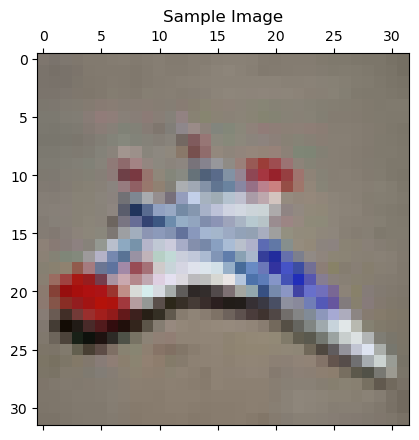

In [71]:
image = X_train[30]
plt.figure(figsize=(4, 4))
plt.matshow(image)
plt.title('Sample Image')
plt.show()

In [72]:
Y_train[30]

array([0], dtype=uint8)

In [73]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [74]:
shape1 = X_train.shape
shape2 = X_test.shape


In [75]:
X_train_flattened = X_train.reshape(shape1[0],shape1[1]*shape1[2]*shape1[3])
X_test_flattened = X_test.reshape(shape2[0],shape2[1]*shape2[3]*shape[2])

In [76]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_flattened)
X_test_scaled = scaler.fit_transform(X_test_flattened)

In [77]:
X_train_flattened[0]

array([ 59,  62,  63, ..., 123,  92,  72], dtype=uint8)

In [78]:
X_train_flattened.shape

(50000, 3072)

In [88]:
model = keras.Sequential([
    keras.layers.Dense(256, input_shape = (3072,), activation = 'relu'),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])

In [89]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [90]:
model.fit(X_train_scaled, Y_train, epochs = 15)

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3425 - loss: 1.8879
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4589 - loss: 1.5353
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4947 - loss: 1.4322
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5227 - loss: 1.3554
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5487 - loss: 1.2738
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5682 - loss: 1.2195
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5881 - loss: 1.1638
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6085 - loss: 1.1123
Epoch 9/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6233 - loss: 1.0649
Epoch 10/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6397 - loss: 1.0244
Epoch 11/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6493 - loss: 0.9768
Epoch 12/15
1563/1563 ━━━━━━━━

In [91]:
model.evaluate(X_test_scaled, Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 732us/step - accuracy: 0.5248 - loss: 1.5221


[1.5305540561676025, 0.5217999815940857]

In [98]:

y_pred = model.predict(X_test_scaled)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 701us/step


In [99]:
Y_test[3]

array([0], dtype=uint8)

In [100]:
import numpy as np
y_pred = [np.argmax(i) for i in y_pred]

In [101]:
y_pred[3]

0